In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve)

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

print("✅ Dataset loaded successfully!")
print("Features:", X.shape[1])
print("Samples:", X.shape[0])
print("Classes:", target_names)

✅ Dataset loaded successfully!
Features: 30
Samples: 569
Classes: ['malignant' 'benign']


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print("\nTraining samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 398
Testing samples: 171


In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
y_pred_train = np.full(y_train.shape, y_train.mean())
y_pred_test = np.full(y_test.shape, y_train.mean())

In [6]:
n_estimators = 50
learning_rate = 0.1
max_depth = 1

In [7]:
models = []
for i in range(n_estimators):

    residuals = y_train - y_pred_train

    tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    tree.fit(X_train_scaled, residuals)
    models.append(tree)

    update = tree.predict(X_train_scaled)
    y_pred_train += learning_rate * update
    y_pred_test += learning_rate * tree.predict(X_test_scaled)


    mse = np.mean((y_train - y_pred_train) ** 2)
    print(f"Iteration {i+1}/{n_estimators} - Training MSE: {mse:.4f}")

print("\n✅ Gradient Boosting training complete!")

Iteration 1/50 - Training MSE: 0.2020
Iteration 2/50 - Training MSE: 0.1751
Iteration 3/50 - Training MSE: 0.1530
Iteration 4/50 - Training MSE: 0.1343
Iteration 5/50 - Training MSE: 0.1185
Iteration 6/50 - Training MSE: 0.1054
Iteration 7/50 - Training MSE: 0.0943
Iteration 8/50 - Training MSE: 0.0850
Iteration 9/50 - Training MSE: 0.0771
Iteration 10/50 - Training MSE: 0.0705
Iteration 11/50 - Training MSE: 0.0650
Iteration 12/50 - Training MSE: 0.0603
Iteration 13/50 - Training MSE: 0.0563
Iteration 14/50 - Training MSE: 0.0530
Iteration 15/50 - Training MSE: 0.0501
Iteration 16/50 - Training MSE: 0.0477
Iteration 17/50 - Training MSE: 0.0456
Iteration 18/50 - Training MSE: 0.0439
Iteration 19/50 - Training MSE: 0.0424
Iteration 20/50 - Training MSE: 0.0411
Iteration 21/50 - Training MSE: 0.0400
Iteration 22/50 - Training MSE: 0.0390
Iteration 23/50 - Training MSE: 0.0381
Iteration 24/50 - Training MSE: 0.0373
Iteration 25/50 - Training MSE: 0.0366
Iteration 26/50 - Training MSE: 0.

In [8]:
y_pred_binary = (y_pred_test >= 0.5).astype(int)


📊 Model Performance on Test Set:
Accuracy:  0.9240
Precision: 0.9434
Recall:    0.9346
F1-Score:  0.9390
ROC AUC:   0.9820


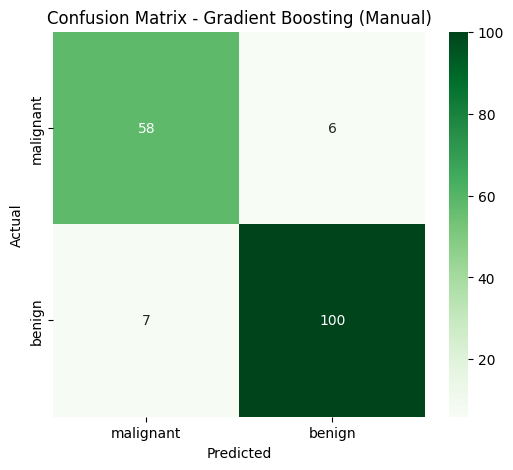


Detailed Classification Report:
              precision    recall  f1-score   support

   malignant       0.89      0.91      0.90        64
      benign       0.94      0.93      0.94       107

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



In [9]:
acc = accuracy_score(y_test, y_pred_binary)
prec = precision_score(y_test, y_pred_binary)
rec = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred_test)
cm = confusion_matrix(y_test, y_pred_binary)

print("\n📊 Model Performance on Test Set:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting (Manual)")
plt.show()


print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_binary, target_names=target_names))

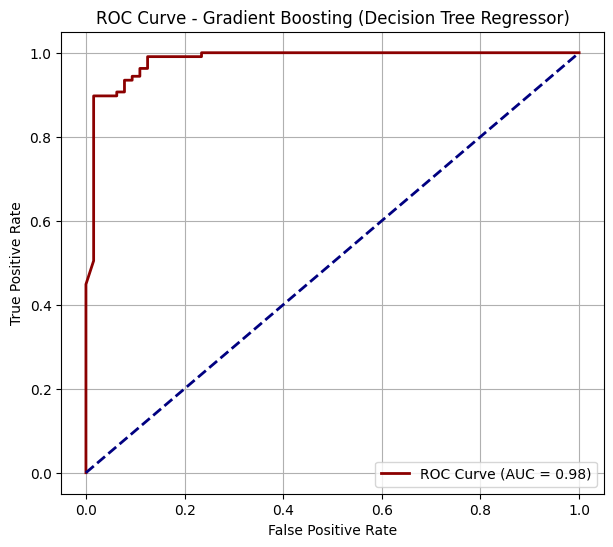

In [10]:
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkred', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting (Decision Tree Regressor)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()